# BBC News Text Classification (ML Prototype)

## Goal of this Notebook
In this notebook, we will build a **text classification machine learning model**
using the BBC News dataset.

We are using this dataset to:
- Understand how text classification works
- Learn the end-to-end ML pipeline
- Later integrate this model into a backend API

Resources:
- Tutorial Followed From Scaler - https://www.scaler.com/topics/machine-learning/bbc-news-classification/
- Dataset Collected From BBC - http://mlg.ucd.ie/datasets/bbc.html


### What are We Building?

In the BBC News Classification Project, we are building a predictive model to evaluate the various news records and classify them accordingly with the help of some parameters.The parameters into consideration are the various headlines with their respective categories. After cleaning and preprocessing the dataset using NLP techniques, we will use Machine Learning algorithms like Random Forest and SVM to classify each headline to its respective category.

### Pre-requisites

To churn the best out of this article, the following prerequisites would be a plus:

- Basic Knowledge of Python would be beneficial.
- Implementation of libraries like Pandas, Numpy, Seaborn, Matplotlib, and SciKit Learn.
- Understanding of Machine Learning algorithms like Random Forest, Linear, and Logistic Regression.
- Intermediate understanding of various text cleaning and preprocessing techniques like stemming and lemmatization.

### How Are We Going to Build This?

Here's how we are going to work on this project:

- Libraries - Importing the necessary NLP and ML libraries.
- Data Analysis - This step will enable us to figure out the various values and features of the dataset.
- Data Visualization - With basic Data Visualization, we will be able to figure out the various underlying patterns of our dataset.
- Preprocessing - Since we are working with textual data in this project, preprocessing is very important for us to create a classifier. Using techniques like Tokenization and Lemmatization, we'll make our data model-ready.
- Model Training - In this step, we will use various Machine Learning algorithms like Random Forest, Logistic Regression, SVC, etc., to try and create a classifier that successfully classifies news to their respective categories.
- Model Evaluation - To make sure our classifier is working the way we want it to, we'll perform various evaluation techniques like accuracy and ROC score.
- Model Testing - Finally, we will test our classifier with real-life data to see if it can actually predict the category of the headline.##

### Final Output

Our final output would be to create a classifier that can predict the headline to its respective category.

```
Headline: ['Tim Scott optimistic about Congress progress on police reform']
POLITICS
```

#### Requirements

Environment - GitHub Codespace
Libraries - Pandas, Numpy, Seaborn, Matplotlib, SciKit Learn, PorterStemmer, Lemmatizer, stopwords, etc.

In [ ]:
### Install the dependencies

%pip install pandas scikit-learn matplotlib joblib seaborn nltk wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/90/99/a4bc45e087f7f3f11893b0a4feea5d9d72ecd75d9c615341e04de069023b/wordcloud-1.9.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.2/555.2 kB 3.0 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Algorithms Used in BBC News Classification

For this project, here are the Machine Algorithms that we used to successfully predict the category from its headline:

- **Logistic Regression** is a classification algorithm. It is used to forecast a binary outcome based on a number of independent variables.
- **Naive Bayes** algorithm is a supervised learning method for classification issues that is based on the Bayes theorem. It is primarily employed in text categorization with an extensive training set.
- **Random Forest** grows and combines different decision trees to produce a "forest." The Random Forest model is built on the premise that different uncorrelated models (decision trees) perform noticeably better when combined than when used independently.
- **Linear SVC** (Support Vector Classifier) helps us by fitting our data, returning a "best fit" hyperplane that divides or categorizes your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

## Step 1: Downloading the Dataset

We are using the **BBC News Dataset** from an official academic source:
http://mlg.ucd.ie/datasets/bbc.html

The dataset contains:
- 2225 news articles
- 5 categories: business, entertainment, politics, sport, tech

Each article is a plain text file.
Each folder name represents the label.

In [44]:
!wget -O bbc-fulltext.zip http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip


--2026-01-12 03:18:05--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 

137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874079 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  2.91MB/s    in 0.9s    

2026-01-12 03:18:07 (2.91 MB/s) - ‘bbc-fulltext.zip’ saved [2874079/2874079]



In [18]:
!unzip bbc-fulltext.zip

Archive:  bbc-fulltext.zip
   creating: bbc/
   creating: bbc/entertainment/
  inflating: bbc/entertainment/289.txt  
  inflating: bbc/entertainment/262.txt  
  inflating: bbc/entertainment/276.txt  
  inflating: bbc/entertainment/060.txt  
  inflating: bbc/entertainment/074.txt  
  inflating: bbc/entertainment/048.txt  
  inflating: bbc/entertainment/114.txt  
  inflating: bbc/entertainment/100.txt  
  inflating: bbc/entertainment/128.txt  
  inflating: bbc/entertainment/316.txt  
  inflating: bbc/entertainment/302.txt  
  inflating: bbc/entertainment/303.txt  
  inflating: bbc/entertainment/317.txt  
  inflating: bbc/entertainment/129.txt  
  inflating: bbc/entertainment/101.txt  
  inflating: bbc/entertainment/115.txt  
  inflating: bbc/entertainment/049.txt  
  inflating: bbc/entertainment/075.txt  
  inflating: bbc/entertainment/061.txt  
  inflating: bbc/entertainment/277.txt  
  inflating: bbc/entertainment/263.txt  
  inflating: bbc/entertainment/288.txt  
  inflating: bbc/ente


  inflating: bbc/entertainment/224.txt  
  inflating: bbc/entertainment/218.txt  
  inflating: bbc/entertainment/280.txt  
  inflating: bbc/entertainment/294.txt  
  inflating: bbc/entertainment/243.txt  
  inflating: bbc/entertainment/257.txt  
  inflating: bbc/entertainment/082.txt  
  inflating: bbc/entertainment/096.txt  
  inflating: bbc/entertainment/041.txt  
  inflating: bbc/entertainment/055.txt  
  inflating: bbc/entertainment/069.txt  
  inflating: bbc/entertainment/135.txt  
  inflating: bbc/entertainment/121.txt  
  inflating: bbc/entertainment/109.txt  
  inflating: bbc/entertainment/337.txt  
  inflating: bbc/entertainment/323.txt  
  inflating: bbc/entertainment/322.txt  
  inflating: bbc/entertainment/336.txt  
  inflating: bbc/entertainment/108.txt  
  inflating: bbc/entertainment/120.txt  
  inflating: bbc/entertainment/134.txt  
  inflating: bbc/entertainment/068.txt  
  inflating: bbc/entertainment/054.txt  
  inflating: bbc/entertainment/040.txt  
  inflating: bb

In [19]:
!ls -l

total 2960
drwxr-xr-x+ 7 codespace codespace    4096 Apr  5  2015 bbc
-rw-rw-rw-  1 codespace codespace 2874079 Mar 27  2022 bbc-fulltext.zip
-rw-rw-rw-  1 codespace codespace  148213 Jan 12 02:51 train.ipynb


### Creating CSV Dataset from BBC Folder Structure

The Scaler tutorial uses a CSV file (`bbc-text.csv`).
Since we downloaded the official dataset in folder format,
we will create this CSV ourselves.

In [ ]:
import os
import pandas as pd

texts = []
categories = []

base_path = "bbc"

for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    if not os.path.isdir(category_path):
        continue
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, "r", encoding="latin-1") as f:
            texts.append(f.read())
            categories.append(category)

bbc_text = pd.DataFrame({
    "text": texts,
    "category": categories
})

bbc_text.head()

,text,category
0,Rap boss arrested over drug find\n\nRap mogul ...,entertainment
1,Dirty Den's demise seen by 14m\n\nMore than 14...,entertainment
2,Beastie Boys win sampling battle\n\nUS rappers...,entertainment
3,Oasis star fined for German brawl\n\nOasis sin...,entertainment
4,BBC to pour Â£9m into new comedy\n\nThe BBC is...,entertainment


In [21]:
# Save it to csv
bbc_text.to_csv("bbc-text.csv", index=False)

In [22]:
!ls -l

total 7936
drwxr-xr-x+ 7 codespace codespace    4096 Apr  5  2015 bbc
-rw-rw-rw-  1 codespace codespace 2874079 Mar 27  2022 bbc-fulltext.zip
-rw-rw-rw-  1 codespace codespace 5090121 Jan 12 02:55 bbc-text.csv
-rw-rw-rw-  1 codespace codespace  152008 Jan 12 02:55 train.ipynb


In [27]:
# Read Files into Python

import pandas as pd

# Read our dataset using read_csv()
bbc_text = pd.read_csv('bbc-text.csv')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head()


,News_Headline,category
0,Rap boss arrested over drug find\n\nRap mogul ...,entertainment
1,Dirty Den's demise seen by 14m\n\nMore than 14...,entertainment
2,Beastie Boys win sampling battle\n\nUS rappers...,entertainment
3,Oasis star fined for German brawl\n\nOasis sin...,entertainment
4,BBC to pour Â£9m into new comedy\n\nThe BBC is...,entertainment


# Step 2: Visualization of the Dataset

Now that we have loaded our dataset, let us get some insights. We need to find a way to generate ideas by looking at the dataset alone. Hence, we will use Seaborn to see the various plots from our dataset.

Firstly, let us check the total number of headlines using a simple bar plot.

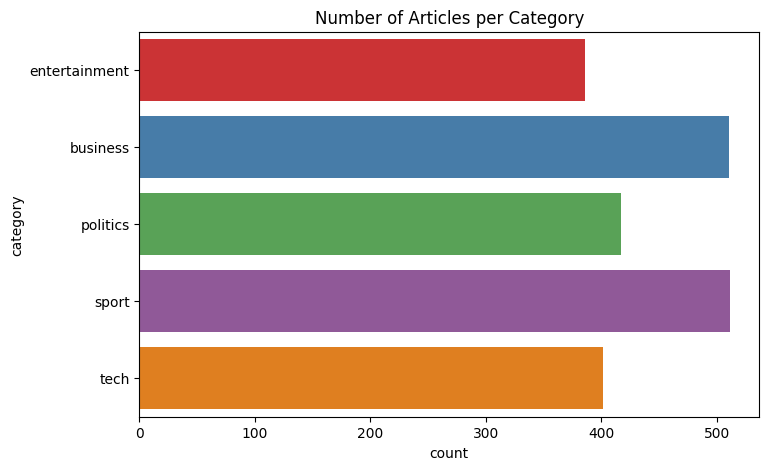

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(
    data=bbc_text,
    y="category",
    hue="category",
    palette="Set1",
    legend=False
)
plt.title("Number of Articles per Category")
plt.show()


### We will visualize the number of stop words present in our dataset:

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


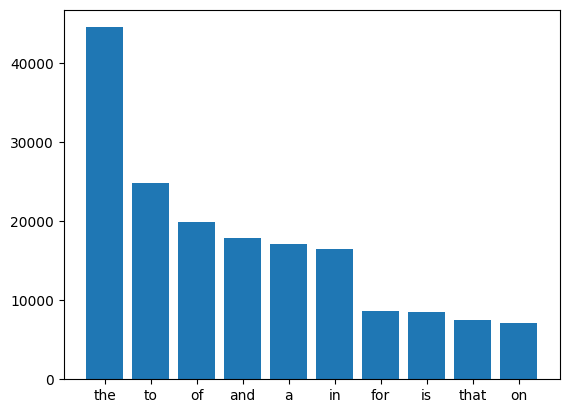

In [34]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_text['News_Headline'])


### Using a rainbow plot, we will determine the most frequently occurring words in our dataset:

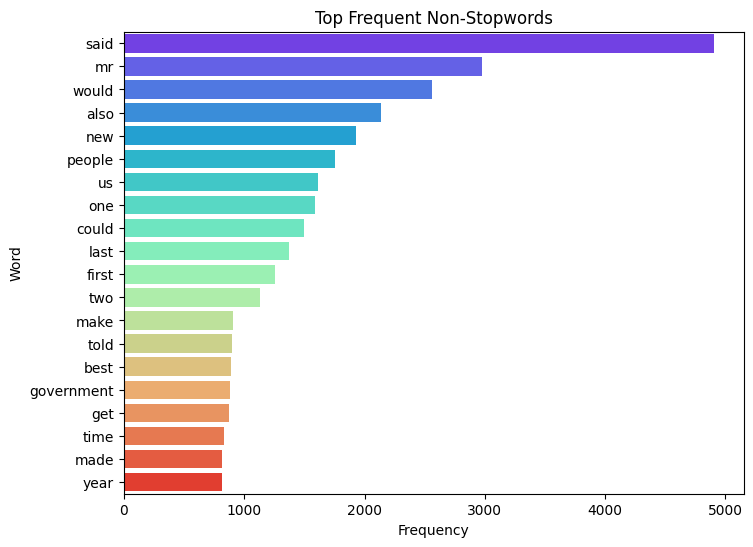

In [39]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def top_frequent_words(data):
    stop = set(stopwords.words('english'))

    data_split = data.str.lower().str.split()
    data_list = data_split.values.tolist()
    corpus = [word for i in data_list for word in i]

    counter = Counter(corpus)
    most_common = counter.most_common()

    words, counts = [], []
    for word, count in most_common:
        if word not in stop and word.isalpha():
            words.append(word)
            counts.append(count)
        if len(words) == 20:
            break

    # Create DataFrame for seaborn
    plot_df = pd.DataFrame({
        "word": words,
        "count": counts
    })

    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=plot_df,
        x="count",
        y="word",
        hue="word",
        palette="rainbow",
        legend=False
    )
    plt.title("Top Frequent Non-Stopwords")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

top_frequent_words(bbc_text["News_Headline"])


### To conclude, let us create a word cloud to visualize all the words in our dataset:

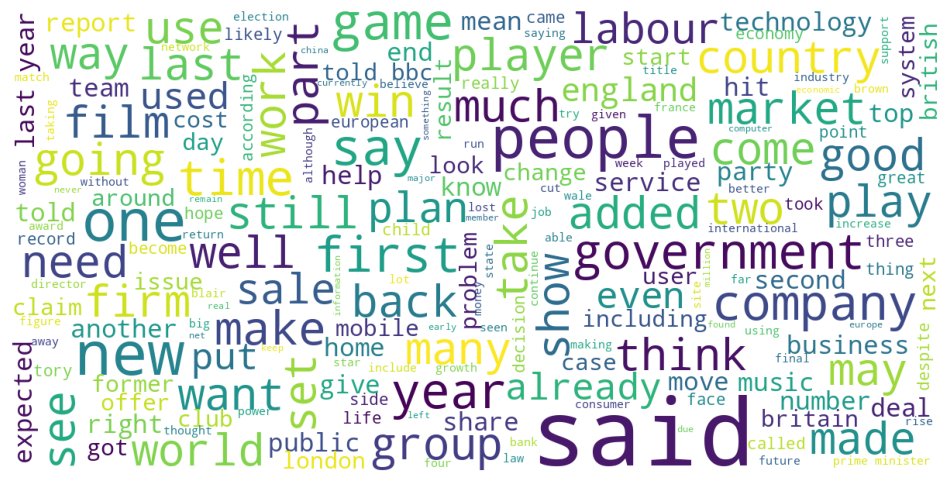

In [ ]:
import os
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

# Force NLTK data to live inside the repo (so it persists and is discoverable)
NLTK_DATA_DIR = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(NLTK_DATA_DIR, exist_ok=True)

# Tell NLTK explicitly where to look
if NLTK_DATA_DIR not in nltk.data.path:
    nltk.data.path.insert(0, NLTK_DATA_DIR)


for pkg in ["stopwords", "wordnet", "punkt", "punkt_tab", "omw-1.4"]:
    try:
        nltk.download(pkg, download_dir=NLTK_DATA_DIR, quiet=True)
    except Exception as e:
        print(f"NLTK download warning for {pkg}: {e}")

# Use the tokenizer directly (avoids some wrapper edge-cases)
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

def plot_wordcloud(data):
    stop = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    corpus = []
    for text in data:
        tokens = tokenizer.tokenize(str(text).lower())
        tokens = [
            lemmatizer.lemmatize(w)
            for w in tokens
            if w.isalpha() and w not in stop and len(w) > 2
        ]
        corpus.extend(tokens)

    wc = WordCloud(
        background_color="white",
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(" ".join(corpus))

    plt.figure(figsize=(12, 12))
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

# Run
plot_wordcloud(bbc_text["News_Headline"])


Now that we have finished generating insights using visualization, let us move on to cleaning and preprocessing our dataset.

# Step 3:  Data Preprocessing

Right now, our dataset is not ideal for model building. It consists of things like stop words, recurring words, punctuations, inconsistencies, etc., which will make our model under/overfit. Using basic techniques like tokenization, lemmatization, etc, we will be able to clean and preprocess our dataset.

### Lowering
We will make sure that our dataset is in lowercase, as it'll make it consistent throughout entirely.

In [47]:
bbc_text = bbc_text.apply(lambda x: x.astype(str).str.lower())

### Tokenization

Splitting paragraphs and sentences into smaller units so they are easily trained in Natural Language Processing is called tokenization. The NLTK module in Python has word_tokenize(), which helps us perform tokenization.

In [48]:
# Tokenization
bbc_text['text_clean'] = bbc_text['News_Headline'].apply(nltk.word_tokenize)
print('Step 1-Tokenization Done!.')
bbc_text.head()

Step 1-Tokenization Done!.


,News_Headline,category,text_clean
0,rap boss arrested over drug find\n\nrap mogul ...,entertainment,"[rap, boss, arrested, over, drug, find, rap, m..."
1,dirty den's demise seen by 14m\n\nmore than 14...,entertainment,"[dirty, den, 's, demise, seen, by, 14m, more, ..."
2,beastie boys win sampling battle\n\nus rappers...,entertainment,"[beastie, boys, win, sampling, battle, us, rap..."
3,oasis star fined for german brawl\n\noasis sin...,entertainment,"[oasis, star, fined, for, german, brawl, oasis..."
4,bbc to pour â£9m into new comedy\n\nthe bbc is...,entertainment,"[bbc, to, pour, â£9m, into, new, comedy, the, ..."


### Stop Word Removal

The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and do not add much information to the text.


In [49]:
if len(bbc_text)==1:
  stop_words = set(stopwords.words('english')) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  filtered_sentence = []   
  for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w)
else:
  stop_words=set(nltk.corpus.stopwords.words("english"))
  bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
  print('Step 2-All stop words are removed from the list.')
  print(bbc_text.head(5))

Step 2-All stop words are removed from the list.
                                       News_Headline       category  \
0  rap boss arrested over drug find\n\nrap mogul ...  entertainment   
1  dirty den's demise seen by 14m\n\nmore than 14...  entertainment   
2  beastie boys win sampling battle\n\nus rappers...  entertainment   
3  oasis star fined for german brawl\n\noasis sin...  entertainment   
4  bbc to pour â£9m into new comedy\n\nthe bbc is...  entertainment   

                                          text_clean  
0  [rap, boss, arrested, drug, find, rap, mogul, ...  
1  [dirty, den, 's, demise, seen, 14m, 14, millio...  
2  [beastie, boys, win, sampling, battle, us, rap...  
3  [oasis, star, fined, german, brawl, oasis, sin...  
4  [bbc, pour, â£9m, new, comedy, bbc, invest, â£...  


### Stemming and Lemmatization

Stemming is the practice of removing the last few characters from a word, which frequently results in inaccurate spelling and meanings. By taking context into account, lemmatization reduces a term to its logical base form or lemma.

In [51]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
bbc_text["text_clean"] = bbc_text["text_clean"].apply(
    lambda x: [stemmer.stem(y) for y in x]
)

### Encoding Data

The process of encoding meaningful text into number/vector representation to maintain the relationship between words and sentences is called Encoding Data.

In this project, we will encode our dataset using the TF-IDF Vectorizer in NLP.

In [53]:
# TF-IDF (Fix: join token lists into strings)
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert list of tokens -> single string document
bbc_text["text_clean_str"] = bbc_text["text_clean"].apply(lambda x: " ".join(x))

tf_idf = TfidfVectorizer(
    max_features=1000,
    lowercase=True,
    analyzer='word',
    stop_words='english',
    ngram_range=(1,1)
)

tf_idf1 = tf_idf.fit_transform(bbc_text["text_clean_str"])
tf_idf1


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 177434 stored elements and shape (2225, 1000)>

To conclude, we will map the numerical values to the various categories of our dataset:

In [54]:
bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
bbc_text.category.unique()

array([3, 1, 4, 2, 0])

# Step 3: Model Training

Before moving on with model training, we will split our dataset into train and test using train_test_split() provided by sklearn.

In [56]:
from sklearn.model_selection import train_test_split

X = bbc_text.text_clean
y = bbc_text.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)

To remove spaces, commas, exclamation, etc., we will use the CountVectorizer() function.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Use string text, not token lists
X = bbc_text["text_clean_str"]
y = bbc_text["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=1
)

vector = CountVectorizer(stop_words="english", lowercase=False)

vector.fit(X_train)

X_transformed = vector.transform(X_train)
X_transformed.toarray()

X_test_transformed = vector.transform(X_test)


### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)
# Fitting our Logistic Regression Model

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_transformed, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


### Linear SVM (Support Vector Machine)

In [65]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=5000)
svm.fit(X_transformed, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

# Step 4: Model Evaluation

Model Evaluation helps us validate our Machine Learning models to know which model performs best and which model needs improvement.

### Logistic Regression Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression evaluation
y_pred_lr = logistic_reg.predict(X_test_transformed)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion matrix (LR):\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression accuracy: 0.9707865168539326
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       170
           1       0.97      0.96      0.96       206
           2       0.99      1.00      0.99       196
           3       0.96      0.99      0.97       150
           4       0.96      0.96      0.96       168

    accuracy                           0.97       890
   macro avg       0.97      0.97      0.97       890
weighted avg       0.97      0.97      0.97       890

Confusion matrix (LR):
 [[161   3   1   4   1]
 [  3 197   0   1   5]
 [  0   0 196   0   0]
 [  1   0   0 148   1]
 [  0   4   1   1 162]]


Naive Bayes accuracy: 0.9696629213483146
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       170
           1       0.97      0.94      0.96       206
           2       0.99      1.00      1.00       196
           3       0.99      0.96      0.98       150
        

### Naive Bayes Metrics

In [ ]:
y_pred_nb = naivebayes.predict(X_test_transformed)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Confusion matrix (NB):\n", confusion_matrix(y_test, y_pred_nb))

### Linear SVM Metrics

In [70]:
print(classification_report(svm.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(svm.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       167
           1       0.95      0.97      0.96       202
           2       1.00      0.98      0.99       200
           3       0.99      0.97      0.98       153
           4       0.96      0.96      0.96       168

    accuracy                           0.97       890
   macro avg       0.97      0.97      0.97       890
weighted avg       0.97      0.97      0.97       890



[[162   4   0   1   0]
 [  3 196   0   0   3]
 [  2   0 196   0   2]
 [  2   2   0 148   1]
 [  1   4   0   1 162]]


# Step 5: Model Testing

According to our evaluation, all the models are performing exceptionally well. All of them have similar accuracy and precision score (97-98%)

To check if our Machine Learning models perform well with actual data, we will take some of the real-time data available on the BBC website and see what category they are in. Since we can use any of our models, we will go with Naive Bayes

In [72]:
headline1 = ['Portugal crash out of FIFA World Cup 2022, Ronaldo in tears']

vec = vector.transform(headline1).toarray()

print('Headline:', headline1)
print(
    str(list(naivebayes.predict(vec))[0])
        .replace('0', 'TECH')
        .replace('1', 'BUSINESS')
        .replace('2', 'SPORTS')
        .replace('3', 'ENTERTAINMENT')
        .replace('4', 'POLITICS')
)


Headline: ['Portugal crash out of FIFA World Cup 2022, Ronaldo in tears']
SPORTS


# Freeze the ML artifact

### Save the artifact

In [83]:
import os, joblib

id_to_label = {0: "tech", 1: "business", 2: "sport", 3: "entertainment", 4: "politics"}
label_to_id = {v: k for k, v in id_to_label.items()}
best_model= naivebayes

save_path = "bbc_model.joblib" if os.path.basename(os.getcwd()) == "ml" else "ml/bbc_model.joblib"

joblib.dump(
    {"vectorizer": vector, "model": best_model, "id_to_label": id_to_label},
    save_path
)

print("Saved:", save_path)


Saved: bbc_model.joblib


### Test the artifact

In [84]:
bundle = joblib.load(save_path)

vec2 = bundle["vectorizer"]
model2 = bundle["model"]
id_to_label2 = bundle["id_to_label"]

test_text = "Portugal crash out of FIFA World Cup 2022, Ronaldo in tears"
X = vec2.transform([test_text])

pred_id = int(model2.predict(X)[0])
pred_label = id_to_label2[pred_id]

print("Predicted ID:", pred_id)
print("Predicted Label:", pred_label)


Predicted ID: 2
Predicted Label: sport
